# Multilayer Perceptron Visualization
### Joseph Coston & Douglas Newquist
Final Project for CSE 489 Machine Learning

11/13/2021

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# project imports
import generator
import mlp

In [2]:
# generate some random datapoints
N = 100
pc = generator.pointCloud2D(f = lambda x,y : (x+y-1 > 0), n=N)

Text(0.5, 0.98, 'Actual Point Output Values')

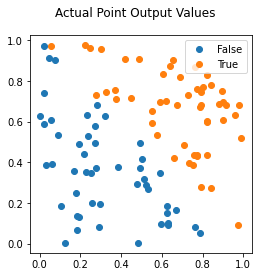

In [3]:
# plot the liearly separable distribution
fig, ax = pc.to_fig()
fig.suptitle('Actual Point Output Values')

In [4]:
# Example linear perceptron describing the line (x + y > 0)
s1 = mlp.Neuron([1,1], lambda x: x > 0, 0)
s1.evaluate((pc.data['x'][0],pc.data['y'][0]))

True

/tmp/ipykernel_31740/592348529.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()-dim/2)*scale, rotation = 45)
/tmp/ipykernel_31740/592348529.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels((ax.get_yticks()-dim/2)*scale, rotation = 45)


[Text(0, -20.0, '-12.0'),
 Text(0, 0.0, '-10.0'),
 Text(0, 20.0, '-8.0'),
 Text(0, 40.0, '-6.0'),
 Text(0, 60.0, '-4.0'),
 Text(0, 80.0, '-2.0'),
 Text(0, 100.0, '0.0'),
 Text(0, 120.0, '2.0'),
 Text(0, 140.0, '4.0'),
 Text(0, 160.0, '6.0'),
 Text(0, 180.0, '8.0'),
 Text(0, 200.0, '10.0')]

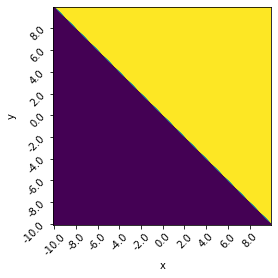

In [5]:
# visualize the output space
dim = 200
scale = 0.1
plt.imshow(s1.get_matrix(dim, scale), origin='lower')
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_xticklabels(np.arange(-dim*scale/2,dim*scale/2,dim*scale/10), rotation=45)
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)
ax.set_xticklabels((ax.get_xticks()-dim/2)*scale, rotation = 45)
ax.set_yticklabels((ax.get_yticks()-dim/2)*scale, rotation = 45)

Text(0, 0.5, 'y')

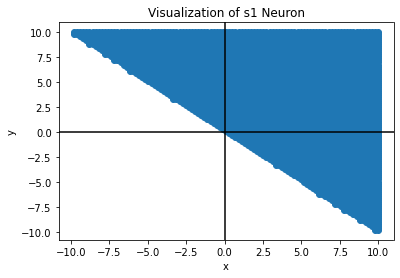

In [6]:
size = 100
X = []
Y = []

for y in np.linspace(-10, 10, size):
	for x in np.linspace(-10, 10, size):
		if s1.evaluate((x, y)):
			X.append(x)
			Y.append(y)

plt.title("Visualization of s1 Neuron")
plt.scatter(X, Y)
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.xlabel("x")
plt.ylabel("y")


In [7]:
l1 = mlp.Layer(N, 2, mlp.sigmoid)
l1.evalute(pc.data['x'].to_list())

[0.6396657335472706,
 0.24689083348794535,
 0.7168133587500041,
 0.2865752423279293,
 0.43942195788556415,
 0.47322268061962725,
 0.7186195100322486,
 0.40095957963416806,
 0.17395752806742454,
 0.5909053268199416,
 0.8054142730016343,
 0.4646104496131414,
 0.3417195830663982,
 0.46772424347235353,
 0.27281539494994,
 0.5550374654219985,
 0.6230611886919913,
 0.38120565432074527,
 0.29714574500926255,
 0.3156676902626192,
 0.3685743233628863,
 0.42218391143897377,
 0.31009255643104167,
 0.3502017804462491,
 0.5755707949603409,
 0.6679155125459739,
 0.4131276176459754,
 0.27160299343040994,
 0.21017110093563812,
 0.348232928991782,
 0.4319878318512693,
 0.45130422457683483,
 0.3813424296692074,
 0.6617188714952148,
 0.22302340123174658,
 0.30544723563213194,
 0.43318826925574677,
 0.5070686849087841,
 0.6183303341198243,
 0.3144574294266947,
 0.4995387179827763,
 0.28542633922396976,
 0.41934845184995223,
 0.4005083961926167,
 0.2586682414235102,
 0.2327532469943925,
 0.5947660766194068

In [8]:
# Triangle with points (2,2), (4,4), (6,2)
line1 = mlp.Neuron([1, -1], lambda x: x >= 0, 0) # x - y >= 0
line2 = mlp.Neuron([0, 1], lambda x: x >= 0, -2) # y >= 2
line3 = mlp.Neuron([-1, -1], lambda x: x >= 0, 8) # -x -y + 8 >= 0

layer1 = mlp.Layer([line1, line2, line3])

all_neuron = mlp.Neuron([1,1,1], lambda x: x > 0, -2)
layer2 = mlp.Layer([all_neuron])

triangle = mlp.NeuralNetwork([layer1, layer2])
triangle.evalute((1, 1))

[False]

In [9]:
# TODO visualize ouptput space 
# TODO see that perceptrons correctly classify the random point clouds

In [11]:
def plot2D_network(n):
	for group in range(n.output_size):
		X = []
		Y = []
		for x in np.linspace(-5, 5, 100):
			for y in np.linspace(-5, 5, 100):
				if n.evalute((x, y))[group]:
					X.append(x)
					Y.append(y)
		plt.scatter(X, Y)			
	plt.axhline(0)
	plt.axvline(0)

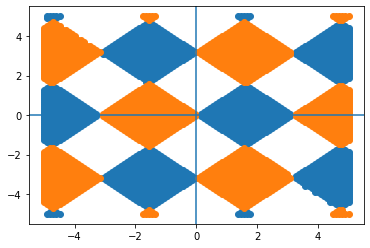

In [33]:
import math

line1 = mlp.Neuron([1, 1], lambda x: math.sin(x) > 0, 0) # sin(x+y) > 0
line2 = mlp.Neuron([1, -1], lambda x: math.sin(x) > 0, 0) # sin(x-y) > 0

layer1 = mlp.Layer([line1, line2])

none_neuron = mlp.Neuron([-1, -1], lambda x: x > 0, 1)
all_neuron = mlp.Neuron([1, 1], lambda x: x > 0, -1)

layer2 = mlp.Layer([all_neuron, none_neuron])

random_net = mlp.NeuralNetwork([layer1, layer2])
plot2D_network(random_net)


In [10]:

plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'